<a href="https://colab.research.google.com/github/bwinna/DADS6003/blob/main/HW7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let initial w = [1,0] and b = -2.5




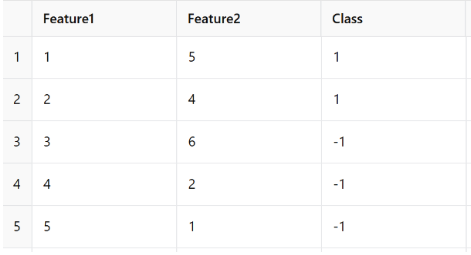


1.Draw a plane

2.Calculate the errors by the SVM cost function (hinge loss)

VM cost function (hinge loss)>> **Hinge Loss=max(0,1−y⋅(w⋅x+b))**

The hinge loss for each data point will be calculated as follows:

Point (1, 5), Class +1 :w⋅x+b=1⋅1+0⋅5−2.5=−1.5, Loss=max(0,1−1⋅(−1.5))=2.5

Point (2, 4), Class +1 :w⋅x+b=1⋅2+0⋅4−2.5=−0.5, Loss=max(0,1−1⋅(−0.5))=1.5

Point (3, 6), Class −1 :w⋅x+b=1⋅3+0⋅6−2.5=0.5, Loss=max(0,1−(−1)⋅0.5)=1.5

Point (4, 2), Class −1 :w⋅x+b=1⋅4+0⋅2−2.5=1.5, Loss=max(0,1−(−1)⋅1.5)=2.5

Point (5, 1), Class −1 :w⋅x+b=1⋅5+0⋅1−2.5=2.5, Loss=max(0,1−(−1)⋅2.5)=3.5


Hinge Loss for each point:
Point [1 5], Class 1, Hinge Loss: 2.50
Point [2 4], Class 1, Hinge Loss: 1.50
Point [3 6], Class -1, Hinge Loss: 1.50
Point [4 2], Class -1, Hinge Loss: 2.50
Point [5 1], Class -1, Hinge Loss: 3.50

Total SVM Error (Sum of Hinge Losses): 11.50


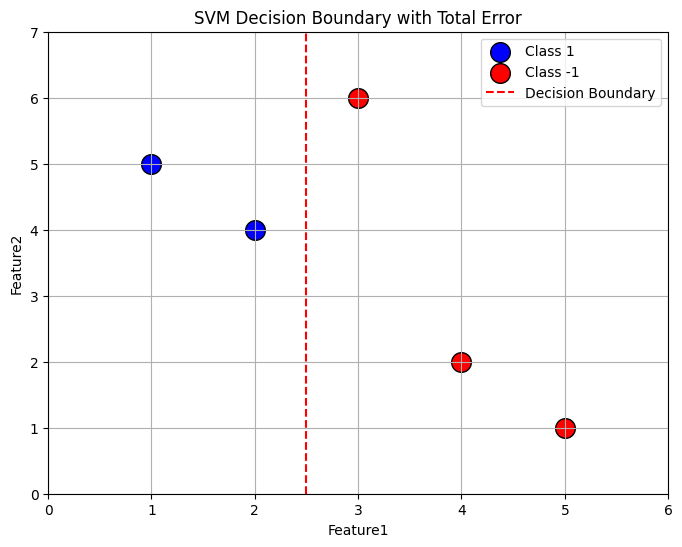

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Data points Feature1, Feature2
X = np.array([[1, 5], [2, 4], [3, 6], [4, 2], [5, 1]])

# Class labels
y = np.array([1, 1, -1, -1, -1])

# Initial parameters
w = np.array([1, 0])  # Initial weights
b = -2.5  # Initial bias

# New point to be added Feature1 = 1, Feature2 = 4
new_point = np.array([[1, 4]])
new_class = -1

# Calculate hinge loss for each point
def hinge_loss(X, y, w, b):
    losses = []
    for i in range(len(X)):
        margin = y[i] * (np.dot(w, X[i]) + b)
        loss = max(0, 1 - margin)
        losses.append(loss)
    return losses

# Calculate hinge loss
losses = hinge_loss(X, y, w, b)

# Calculate total SVM error (sum of hinge losses)
svm_error = sum(losses)

# Print results
print("Hinge Loss for each point:")
for i, loss in enumerate(losses):
    print(f"Point {X[i]}, Class {y[i]}, Hinge Loss: {loss:.2f}")
print(f"\nTotal SVM Error (Sum of Hinge Losses): {svm_error:.2f}")

# Plotting
plt.figure(figsize=(8, 6))

# Plot the existing points
for i, point in enumerate(X):
    if y[i] == 1:
        plt.scatter(point[0], point[1], color='blue', s=200, label='Class 1' if i == 0 else "", edgecolors='k')  # Larger size for circles
    else:
        plt.scatter(point[0], point[1], color='red', s=200, label='Class -1' if i == 2 else "", edgecolors='k')  # Larger size for circles

# Draw the decision boundary (x1 = 2.5)
x_values = np.linspace(0, 6, 100)
plt.axvline(x=2.5, color='red', linestyle='--', label="Decision Boundary")

# Configure the plot
plt.title("SVM Decision Boundary with Total Error")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 7)

# Show the plot
plt.show()


3.If a new point, with class -1, is added to the position (1,4), is it possible that a hard SVM finds the solution?

**Answer:**No, a hard SVM cannot find a solution if the new point
(1,4) with class −1 is added

SVM แบบ Hard Margin ต้องการให้ชุดข้อมูลสามารถแยกออกจากกันได้อย่างสมบูรณ์แบบด้วยเส้น(hyperplane) ซึ่งหมายความว่าต้องสามารถวาดเส้นไฮเปอร์เพลนได้เพื่อให้ข้อมูลของคลาสหนึ่งทั้งหมดอยู่ฝั่งหนึ่ง และ ข้อมูลของอีกคลาสหนึ่งทั้งหมดอยู่ฝั่งตรงข้าม ของเส้นไฮเปอร์เพลน

จุดใหม่ (1,4) ที่มีคลาส −1 อยู่ฝั่งเดียวกันกับจุด (1,5) ซึ่งเป็นข้อมูลของคลาส+1 ตามเส้นไฮเปอร์เพลนเริ่มต้น (x1=2.5) สิ่งนี้ทำให้เกิดความขัดแย้ง เพราะเส้นไฮเปอร์เพลนเดียวไม่สามารถแยกข้อมูลเหล่านี้ได้อย่างถูกต้องโดยที่ยังคงรักษาความถูกต้องของการจัดประเภท (classification) สำหรับจุดข้อมูลอื่น ๆ ทั้งหมด

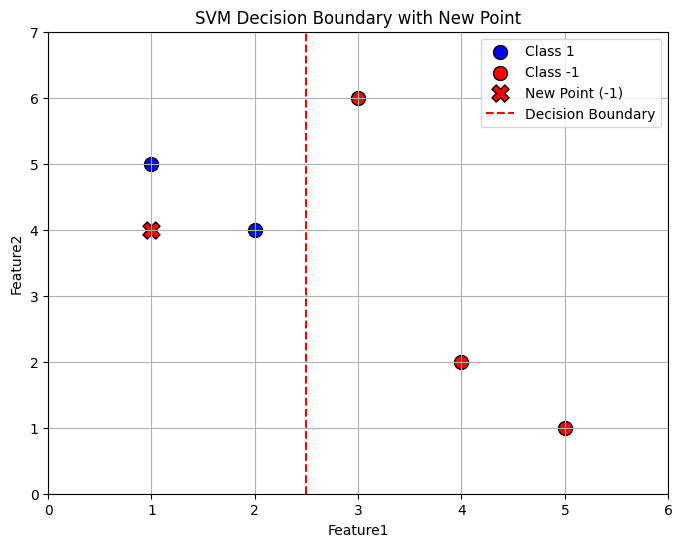

In [15]:

# New point to be added
new_point = np.array([[1, 4]])  # Feature1 = 1, Feature2 = 4
new_class = -1  # Class label

# Plotting
plt.figure(figsize=(8, 6))

# Plot the existing points
for i, point in enumerate(X):
    if y[i] == 1:
        plt.scatter(point[0], point[1], color='blue', s=100, label='Class 1' if i == 0 else "", edgecolors='k')
    else:
        plt.scatter(point[0], point[1], color='red', s=100, label='Class -1' if i == 2 else "", edgecolors='k')

# Plot the new point
plt.scatter(new_point[0, 0], new_point[0, 1], color='red', s=150, marker='X', label='New Point (-1)', edgecolors='k')

# Draw the decision boundary (x1 = 2.5)
x_values = np.linspace(0, 6, 100)
y_values = - (w[0] * x_values + b) / w[1] if w[1] != 0 else np.full_like(x_values, np.nan)  # Handle division by zero
plt.axvline(x=2.5, color='red', linestyle='--', label="Decision Boundary")

# Configure the plot
plt.title("SVM Decision Boundary with New Point")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 7)

# Show the plot
plt.show()
